In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start = '2020-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

c:\Users\krush\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.123718,28132000
1,2020-01-03,67.392998,68.625000,67.277199,68.032997,67.789421,23728000
2,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.460922,34646000
3,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.417580,30054000
4,2020-01-08,69.603996,70.579002,69.542000,70.216003,69.964615,30560000
...,...,...,...,...,...,...,...
995,2023-12-14,134.770004,135.035004,131.059998,133.199997,132.723114,29619100
996,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.360809,58569400
997,2023-12-18,133.860001,138.380005,133.770004,137.190002,136.698822,25699800
998,2023-12-19,138.000000,138.770004,137.449997,138.100006,137.605576,20661000


In [10]:
ma_100_days = data.Close.rolling(100).mean()

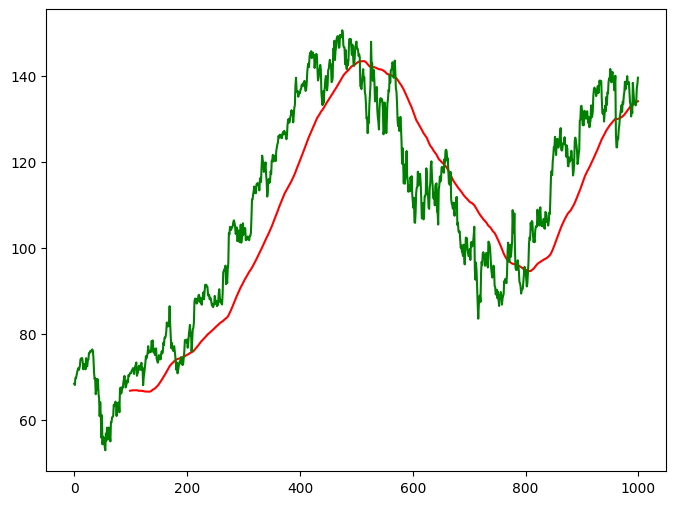

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

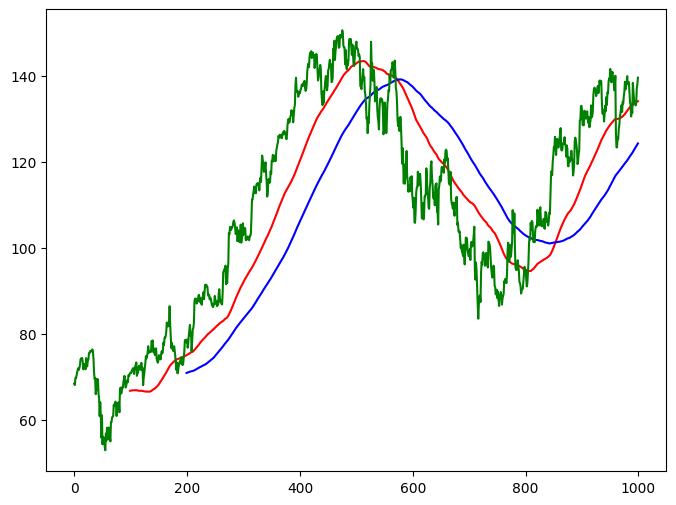

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [14]:
data.dropna(inplace=True)

In [15]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [16]:
data_train.shape[0]

800

In [17]:
data_test.shape[0]

200

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_train_scale = scaler.fit_transform(data_train)

In [22]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [23]:
x, y = np.array(x), np.array(y)

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.2052
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0281
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0180
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0158
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0134
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0127
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0131
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0131
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0113
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0119
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0099
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0123
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0120
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0105
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - l

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [32]:
data_test_scale  =  scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [34]:
y_predict = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step


In [35]:
scale =1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

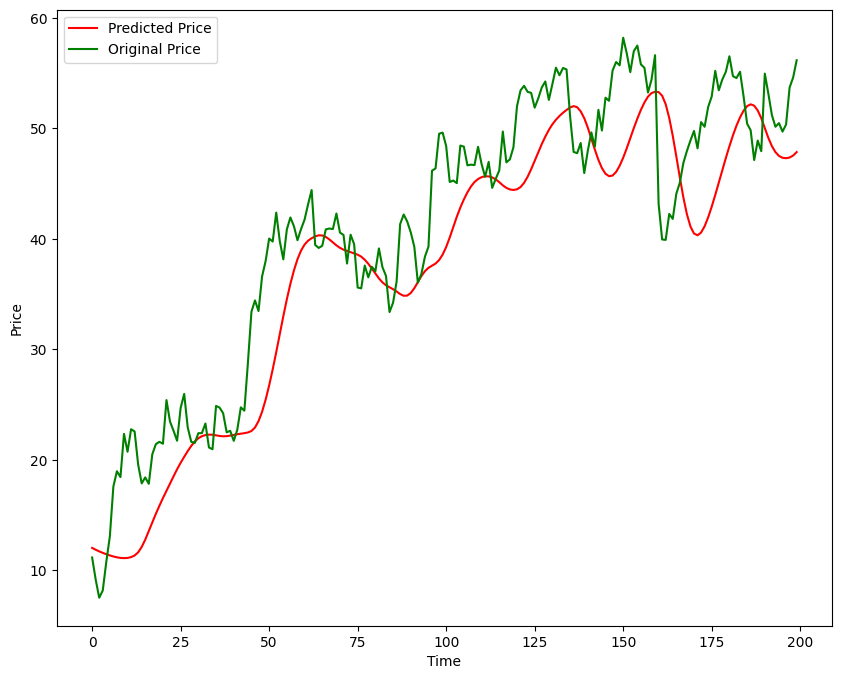

In [38]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Predictions Model.keras')